In [ ]:
!pip install jsonlines
import jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def extract_jsonl(file_path):
    data = []
    with jsonlines.open(file_path) as reader:
        for item in reader:
            data.append(item)
    return data

In [ ]:
results_analysis = extract_jsonl("./results.jsonl")

In [ ]:
bert_score_array = []
for result in results_analysis:
    for score in result["bert_score"]:
        bert_score_array.append(score)
print(bert_score_array)

[0.9508289098739624, 0.9103821516036987, 0.9425839185714722, 0.9376986026763916, 0.9463131427764893, 0.9575169086456299, 0.9674338102340698, 0.8787872195243835, 1.0000001192092896, 1.0, 0.9197558760643005, 0.9180365800857544, 0.8482894897460938, 0.9471503496170044, 0.9466773271560669, 0.8999018669128418, 0.8745236396789551, 1.0000001192092896, 0.9522252082824707, 0.9821544885635376, 0.9575845003128052, 0.9154295921325684, 0.9700640439987183, 0.9760125279426575, 1.0, 0.9902393817901611, 0.9719499945640564, 0.8662152290344238, 0.9256896376609802, 1.0, 0.9130105376243591, 1.0000001192092896, 1.0, 0.9999998807907104, 0.8887125253677368, 0.9861522912979126, 0.9284107089042664, 0.8432244062423706, 1.0, 1.0, 0.9239725470542908, 0.9845894575119019, 0.9372095465660095, 0.9372095465660095, 0.954216718673706, 0.9384633302688599, 0.9614003300666809, 0.9428322911262512, 0.918746292591095, 0.9516341686248779, 1.0, 1.0, 0.853196918964386, 1.0, 1.0, 1.0, 0.9569070339202881, 0.9999999403953552, 1.0, 0.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

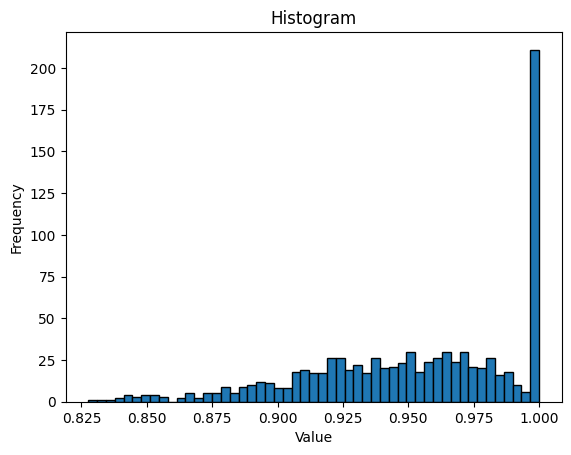

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_histogram_all(numbers, num_bins):
    # Initialize the histogram array with zeros
    histogram = [0] * (num_bins+1)

    # Iterate over each number and increment the corresponding bin count
    for number in numbers:
        if number > 0.995:
            bin_index = num_bins
        else:
            bin_index = int(number * num_bins)
        histogram[bin_index] += 1

    return histogram

num_bins = 50
numbers = bert_score_array

histogram_all= generate_histogram_all(numbers, num_bins)

# Plotting the histogram using Matplotlib
plt.hist(numbers, bins=num_bins+1, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [ ]:
def test(results):
    output = []
    for result in results:
        for i in range(len(result["bert_score"])):
            score = result["bert_score"][i]

            expected_stripped = result["expected_answer"][i].strip()
            output_stripped = result["model_output"][i].strip()

            #check if generated sub-quesion is incomplete      
            if ((expected_stripped.lower() != output_stripped.lower()) and (expected_stripped.lower().startswith(output_stripped.lower()[:-1]))):
                output.append(score)
    return output

[1, 0, 1, 3, 2, 4, 3, 3, 4, 2, 0, 0, 1, 1, 3, 1, 3, 5, 4, 2, 7, 2, 2, 6, 2, 3, 2, 8, 3, 4, 5, 6, 3, 6, 3, 4, 9, 3, 3, 3, 8, 4, 4, 5, 2, 4, 0, 0, 1, 0]
[1, 0, 1, 3, 2, 4, 3, 3, 4, 2, 0, 6, 2, 4, 7, 6, 8, 9, 9, 13, 10, 9, 10, 17, 20, 15, 21, 30, 25, 18, 24, 21, 22, 24, 23, 24, 26, 20, 24, 31, 30, 31, 25, 17, 24, 19, 21, 10, 6, 211]


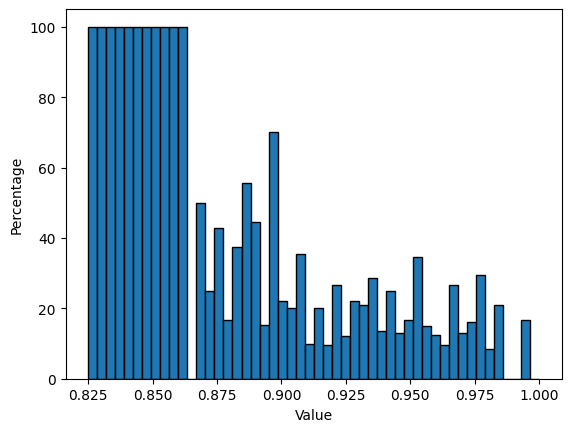

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def histogram_percentage(total, selected, num_bins):
    histogram = [0.0] * num_bins
    
    for i in range(num_bins):

        if total[i] == 0 and selected[i] == 0:
            histogram[i] = 100
        elif total[i] == 0 or selected[i] == 0:
            histogram[i] == 0
        else:
            histogram[i] = selected[i] / total[i] * 100
    
    return histogram

num_bins = 50
filtered = test(results_analysis)

total = [0] * num_bins
selected = [0] * num_bins

min_value = 0.825
max_value = 1.0

bin_width = (max_value - min_value) / num_bins

for number in filtered:
    bin_index = int((number - min_value) / bin_width)
    selected[bin_index] += 1
    
for number in bert_score_array:
    if number >= max_value:
        bin_index = num_bins - 1
    else:
        bin_index = int((number - min_value) / bin_width)
    total[bin_index] += 1
    
print(selected)
print(total)

#create histogram that says how much percent per BERTScore bucket is incomplete
histogram = histogram_percentage(total, selected, num_bins)

# Plotting the histogram using Matplotlib
bin_edges = np.linspace(min_value, max_value, num_bins + 1)
plt.hist(bin_edges[:-1], bin_edges, weights=histogram, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('')
plt.show()



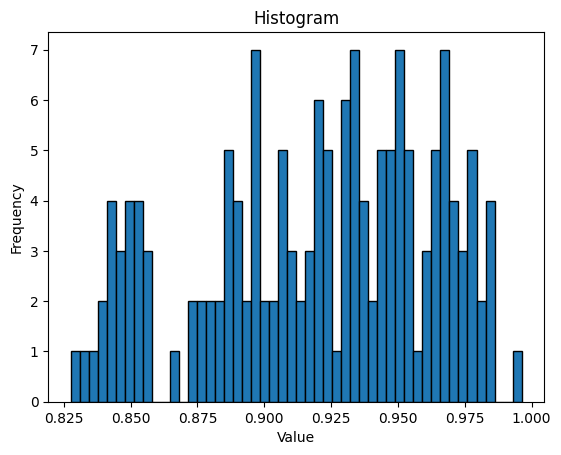

In [ ]:
def generate_histogram_top(numbers, num_bins):
    # Initialize the histogram array with zeros
    histogram = [0] * (num_bins)

    # Iterate over each number and increment the corresponding bin count
    for number in numbers:
        bin_index = int(number * num_bins)
        histogram[bin_index] += 1

    return histogram

numbers = test(results_analysis)
num_bins = 50

#this filteres the bertScores by area. Usefull to look at the distribution in a certain area
filtered_numbers = [num for num in numbers if 0.80 < num <= 0.90]

#create histogram that says how many incomplete sub-questions exist per area.
histogram = generate_histogram_top(numbers, num_bins)

# Plotting the histogram using Matplotlib
plt.hist(numbers, bins=num_bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [ ]:
print(len(filtered_numbers))

103
